# Compiti di algoritmi non supervisionati

In questo compito, applicherai tre algoritmi fondamentali di apprendimento automatico a set di dati famosi:
1. **Clustering K-Means**: segmentazione dei clienti con set di dati al dettaglio
2. **Clustering gerarchico**: classificazione del set di dati del vino

### Istruzioni

- Implementa **almeno** un algoritmo
- Completa attentamente ogni sezione
- Aggiungi il tuo codice dove indicato da `# IL TUO CODICE QUI`
- Fornisci commenti che spiegano il tuo approccio

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random seed for reproducibility
np.random.seed(42)

## Parte 1: Clustering K-Means - Segmentazione dei clienti

#### Attività
1. Caricare e preelaborare il set di dati
2. Eseguire l'ingegneria delle funzionalità
3. Applicare il clustering K-Means
4. Visualizzare e interpretare i segmenti dei clienti

In [2]:
# Load the dataset
retail_data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Ottiengo informazioni generali sul dataframe
print(retail_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
# Controllo i valori nulli per ogni colonna
print(retail_data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
print(retail_data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [6]:
# TODO: Data Preprocessing
# 1. Remove rows with missing values
# 2. Remove negative quantities and zero prices
# 3. Use only Quantity and UnitPrice for the clustering

# YOUR CODE HERE:
# Rimuovo le righe con valori mancanti
retail_data_clean = retail_data.dropna()
# Rimuovo le righe con quantità negative o prezzo zero
retail_data_clean = retail_data_clean[(retail_data_clean['Quantity'] > 0) & (retail_data_clean['UnitPrice'] > 0)]
# Seleziono solo le colonne 'Quantity' e 'UnitPrice'
clustering_data = retail_data_clean[['Quantity', 'UnitPrice']]
# Visualizzo il dataframe preparato per il clustering
print(clustering_data.head())

   Quantity  UnitPrice
0         6       2.55
1         6       3.39
2         8       2.75
3         6       3.39
4         6       3.39


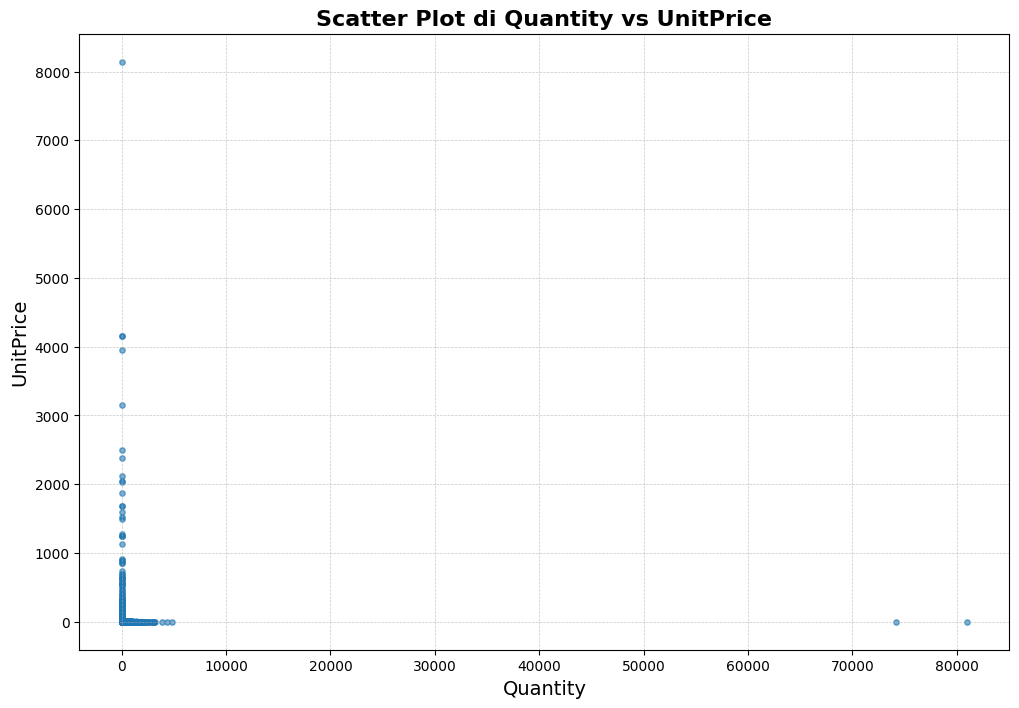

In [7]:
# TODO: Visualise points of dataset

# YOUR CODE HERE:
# Creo un grafico a dispersione (scatter plot)
plt.figure(figsize=(12, 8))
plt.scatter(clustering_data['Quantity'], clustering_data['UnitPrice'], alpha=0.6, s=15)

# Aggiungo le etichette e il titolo  
plt.title('Scatter Plot di Quantity vs UnitPrice', fontsize=16, fontweight='bold') 
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('UnitPrice', fontsize=14)

# Aggiungo una griglia
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostro il grafico
plt.show()

In [8]:
# TODO: Scale the features

# YOUR CODE HERE:
# Creo un'istanza dello StandardScaler
scaler = StandardScaler()

# Scalo le feature 'Quantity' e 'UnitPrice'
scaled_data = scaler.fit_transform(clustering_data)

# Converto i dati scalati in un DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Quantity', 'UnitPrice'])

# Visualizzo i dati scalati
print(scaled_df.head())

   Quantity  UnitPrice
0 -0.038968  -0.025635
1 -0.038968   0.012377
2 -0.027816  -0.016585
3 -0.038968   0.012377
4 -0.038968   0.012377


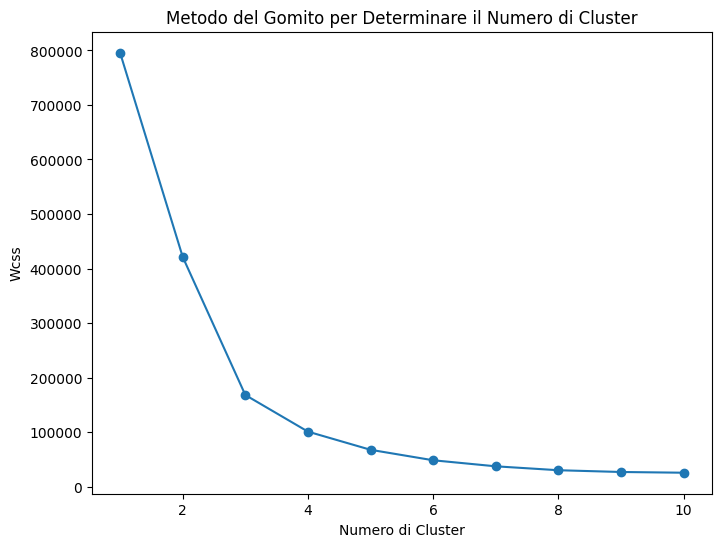

In [9]:
# TODO: Perform K-Means Clustering

# YOUR CODE HERE:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Trovo il numero ottimale di cluster con il metodo del gomito
wcss = []   

# Provo per un range di cluster da 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)  # Usa i dati scalati
    wcss.append(kmeans.inertia_)

# Grafico per il metodo del gomito
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metodo del Gomito per Determinare il Numero di Cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Wcss')
plt.show()


In [10]:
# Eseguo K-Means con il numero di cluster uguale a 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Aggiungo i cluster al DataFrame
scaled_df['Cluster'] = kmeans.labels_

# Visualizzo i dati con i cluster assegnati
print(scaled_df.head())

   Quantity  UnitPrice  Cluster
0 -0.038968  -0.025635        0
1 -0.038968   0.012377        0
2 -0.027816  -0.016585        0
3 -0.038968   0.012377        0
4 -0.038968   0.012377        0


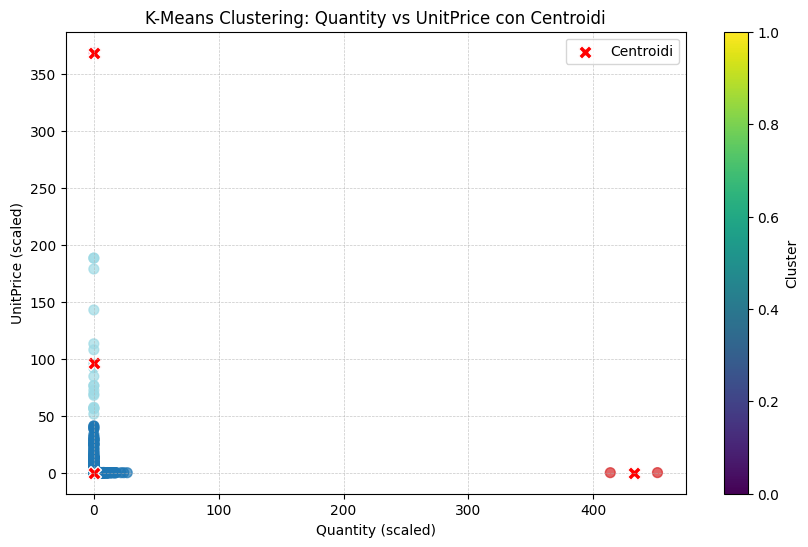

In [11]:
# TODO: Visualise dataset with assign clusters

# YOUR CODE HERE:
# Visualizzare i punti con i cluster
plt.figure(figsize=(10, 6))


plt.scatter(scaled_df['Quantity'], scaled_df['UnitPrice'], c=scaled_df['Cluster'], cmap='tab20', alpha=0.7, s=50)

# Aggiungo i centroidi al grafico
centroids = kmeans.cluster_centers_

# I centroidi sono nelle stesse dimensioni scalate, quindi possiamo aggiungerli
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroidi', edgecolors='white')

# Aggiungere le etichette e il titolo
plt.title('K-Means Clustering: Quantity vs UnitPrice con Centroidi')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')

# Aggiungere la barra dei colori per i cluster
plt.colorbar(label='Cluster')

# Mostrare la legenda
plt.legend()

# Aggiungere la griglia
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrare il grafico
plt.show()

In [12]:
# centri dei cluster, che rappresentano le medie delle feature per ciascun cluster
# Centroidi dei cluster
centroids = kmeans.cluster_centers_

# Visualizzo i centroidi
print("Centroidi dei Cluster:")
print(centroids)


Centroidi dei Cluster:
[[-2.17146990e-03 -5.75545906e-03]
 [ 4.32673514e+02 -7.04361662e-02]
 [-6.68495745e-02  3.68345062e+02]
 [-6.68495745e-02  9.60834254e+01]]


### Interpretazione dei Centroidi dei Cluster:
- **Cluster 1** rappresenta i clienti con comportamenti di acquisto medi, con quantità e prezzi vicini alla media globale.
- **Cluster 2** è composto da clienti che acquistano grandi quantità a prezzi relativamente bassi.
- **Cluster 3** rappresenta i clienti che acquistano piccole quantità ma a prezzi molto alti.
- **Cluster 4** è simile al Cluster 3, ma con prezzi mediamente più bassi rispetto ai clienti del Cluster 3.


## Parte 2: Clustering gerarchico - Classificazione del dataset Wine

#### Attività
1. Carica il dataset Wine
2. Preelabora e ridimensiona le feature
3. Esegui il clustering gerarchico
4. Visualizza i risultati del dendrogramma e del cluster

In [13]:
# Load Wine Dataset

from sklearn.datasets import load_wine

wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

In [14]:
X_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
# Ottiengo informazioni generali sul dataframe
print(X_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [16]:
print(retail_data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


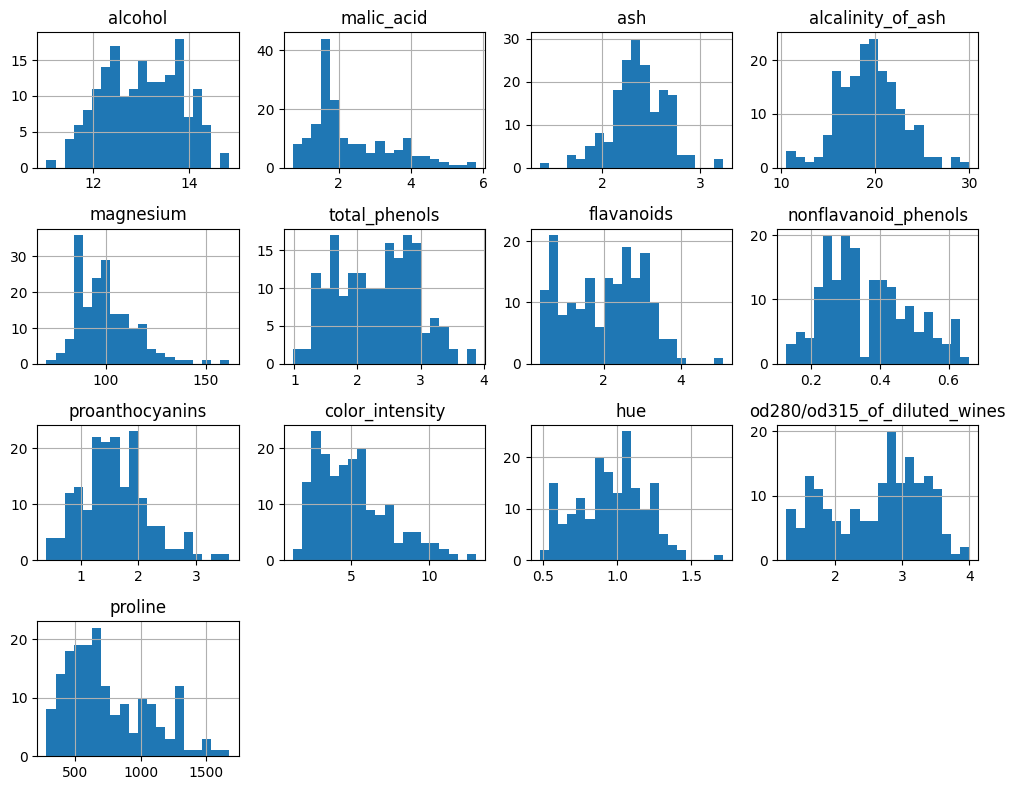

In [17]:
# Visualizzo degli Istogrammi per ogni feature
X_wine.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [18]:
# TODO: Preprocess the data
# 1. Scale the features using StandardScaler
# 2. Ensure no missing values

# YOUR CODE HERE:
# Creo un'istanza di StandardScaler
scaler = StandardScaler()

# Scalo le feature
X_wine_scaled = scaler.fit_transform(X_wine)

# Converto i dati scalati di nuovo in un DataFrame
X_wine_scaled_df = pd.DataFrame(X_wine_scaled, columns=wine.feature_names)

# Mostro le prime righe dei dati scalati
print(X_wine_scaled_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [19]:
# Verifico la presenza di valori mancanti
missing_values = X_wine_scaled_df.isnull().sum()

# Visualizzo i risultati
print("Valori mancanti per ciascuna colonna:\n", missing_values)


Valori mancanti per ciascuna colonna:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


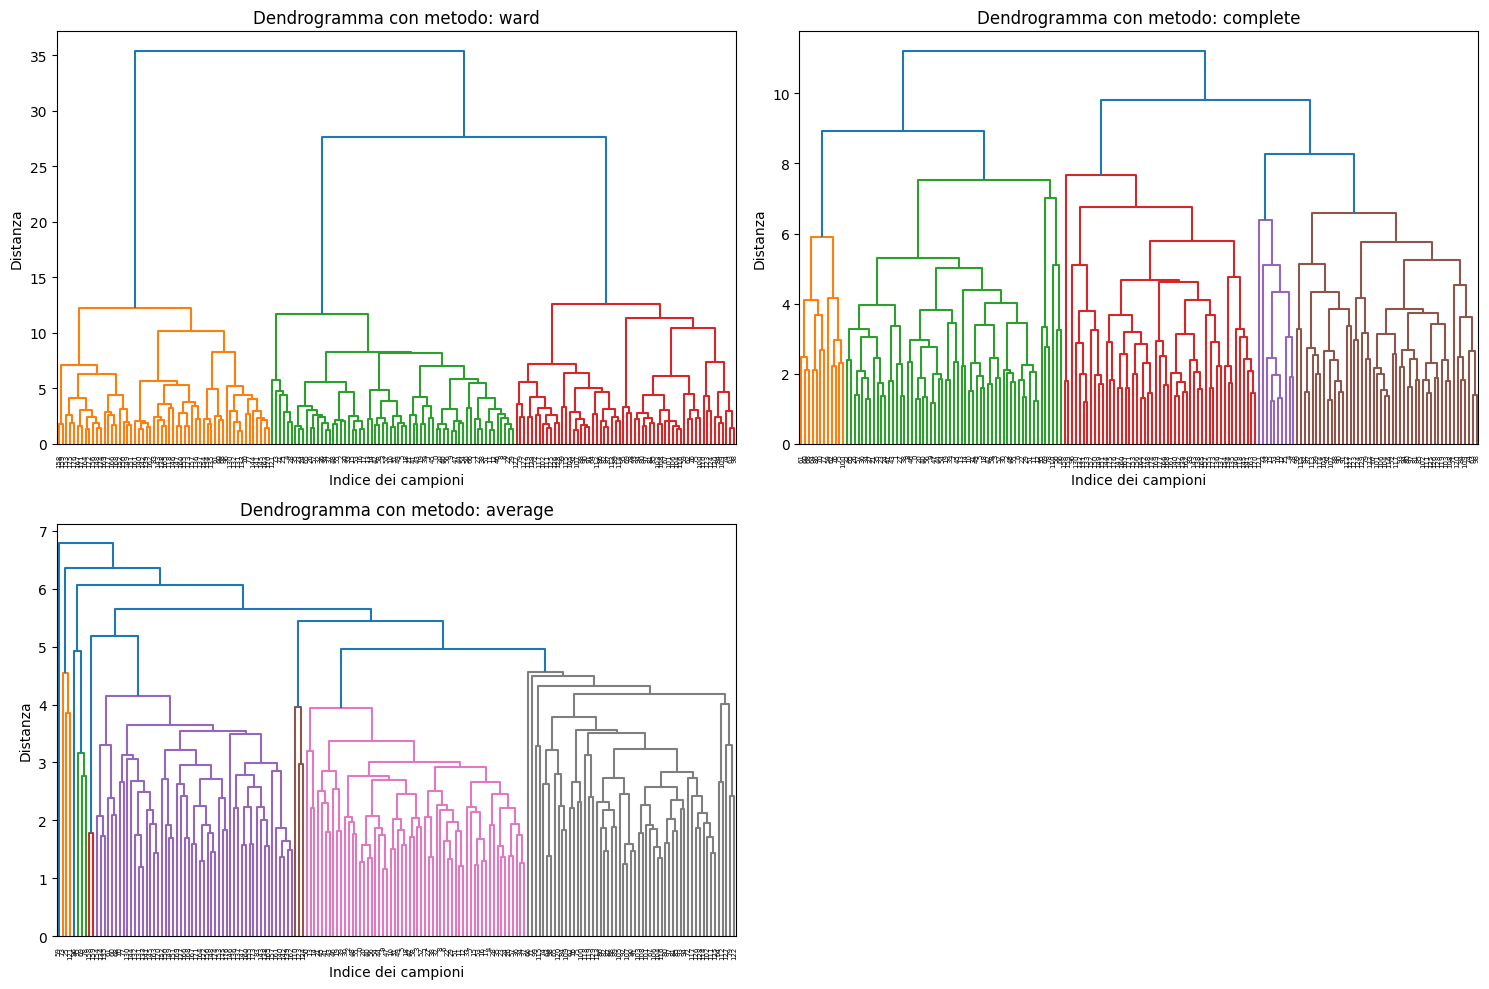

In [20]:
# TODO: Compute linkage matrix for Hierarchical Clustering. Use different linkage methods. Try: 'ward', 'complete', 'average'

# YOUR CODE HERE:

# Definisco i metodi di collegamento
methods = ['ward', 'complete', 'average']

# Creo il grafico per i dendrogrammi
plt.figure(figsize=(15, 10))

for i, method in enumerate(methods, 1):
    # Calcolare la matrice di collegamento
    Z = linkage(X_wine_scaled, method=method)
    
    # Visualizzare il dendrogramma
    plt.subplot(2, 2, i)
    dendrogram(Z)
    plt.title(f'Dendrogramma con metodo: {method}')
    plt.xlabel('Indice dei campioni')
    plt.ylabel('Distanza')

# Mostro il grafico
plt.tight_layout()
plt.show()

Per eseguire il clustering gerarchico sul dataset del vino e calcolare la matrice di collegamento utilizzando diversi metodi di collegamento, utilizzo la libreria `scipy` che fornisce funzioni per il clustering gerarchico. La matrice di collegamento rappresenta la struttura dell'albero gerarchico (dendrogramma), che permette di vedere come vengono raggruppati i dati in cluster.

### **Dendrogramma**:
    - Calcolole matrici di collegamento per ciascun metodo di collegamento (`ward`, `complete`, e `average`).
    - I metodi di collegamento influenzano il modo in cui vengono calcolate le distanze tra i cluster.
    - Con la funzione `dendrogram()` visualizzo l'albero gerarchico in modo da osservare come i cluster vengono uniti progressivamente.

### **Interpretazione dei risultati**:

- **Metodo `ward`**: Minimizzerà la varianza all'interno dei cluster. 
- **Metodo `complete`**: Usa la massima distanza tra i punti di due cluster per determinarne la somiglianza.
- **Metodo `average`**: Usa la distanza media tra tutti i punti nei due cluster.

Il **dendrogramma**  mostra come i cluster si uniscono a diverse distanze (l'altezza dei rami). Se vuoi scegliere un numero specifico di cluster, puoi tagliare l'albero a una certa altezza.


in sintesi
- Ho scalato i dati e calcolato la matrice di collegamento per i tre metodi (`ward`, `complete`, e `average`).
- Hovisualizzato i dendrogrammi per ogni metodo per vedere come i campioni vengono raggruppati.


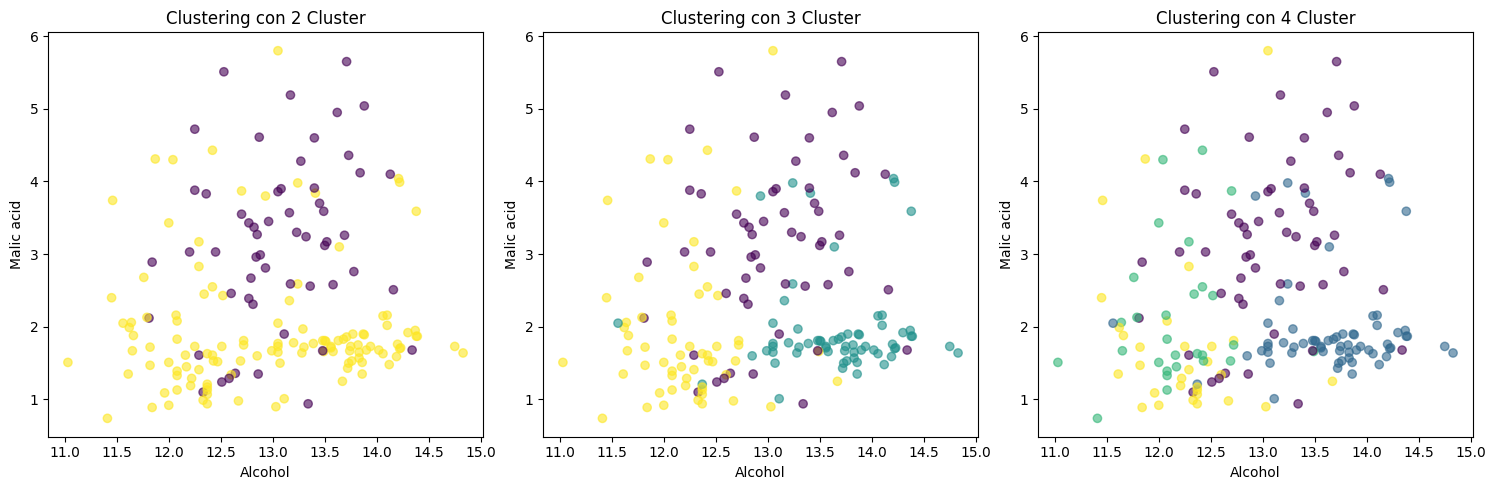

In [21]:
# TODO: Perform Hierarchical Clustering. Try different number of clusters: 2, 3 and 4 clusters. 
# Visualization of Clustering Results on 2 variables on ypur choice.

# YOUR CODE HERE:

from scipy.cluster.hierarchy import linkage, fcluster

# Eseguo il clustering gerarchico
Z = linkage(X_wine_scaled, method='ward')  # Usa il metodo 'ward' per il linkage

# Clustering con 2, 3 e 4 cluster
clusters_2 = fcluster(Z, 2, criterion='maxclust')
clusters_3 = fcluster(Z, 3, criterion='maxclust')
clusters_4 = fcluster(Z, 4, criterion='maxclust')

# Visualizzo i risultati del clustering su due variabili 
# Scelgo, le variabili 'Alcohol' e 'Malic acid' per la visualizzazione
plt.figure(figsize=(15, 5))

# Plot per 2 cluster
plt.subplot(1, 3, 1)
plt.scatter(X_wine['alcohol'], X_wine['malic_acid'], c=clusters_2, cmap='viridis', alpha=0.6)
plt.title('Clustering con 2 Cluster')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

# Plot per 3 cluster
plt.subplot(1, 3, 2)
plt.scatter(X_wine['alcohol'], X_wine['malic_acid'], c=clusters_3, cmap='viridis', alpha=0.6)
plt.title('Clustering con 3 Cluster')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

# Plot per 4 cluster
plt.subplot(1, 3, 3)
plt.scatter(X_wine['alcohol'], X_wine['malic_acid'], c=clusters_4, cmap='viridis', alpha=0.6)
plt.title('Clustering con 4 Cluster')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

# Mostro il grafico
plt.tight_layout()
plt.show()

Ho utilizzato il metodo linkage() con il metodo ward, che è adatto per il clustering gerarchico.
Dopo aver calcolato la matrice di collegamento, utilizzo fcluster() per ottenere i cluster con 2, 3 e 4 cluster, utilizzando il parametro criterion='maxclust'.

Visualizzo i risultati del clustering su un grafico a dispersione, utilizzando le variabili Alcohol (alcol) e Malic acid (acido malico) per l'asse x e y.
I punti sono colorati in base al cluster a cui appartengono.

Ottengo tre grafici a dispersione, uno per ogni configurazione di cluster (2, 3 e 4), dove i punti sono colorati in base al cluster di appartenenza.

Grafico per 2 cluster: Mostra come i dati sono raggruppati in due cluster.
Grafico per 3 cluster: Mostra come i dati sono raggruppati in tre cluster.
Grafico per 4 cluster: Mostra come i dati sono raggruppati in quattro cluster.


**Heatmap** delle distanze tra i centri dei cluster mi aiuta a comprendere la separazione tra i cluster.

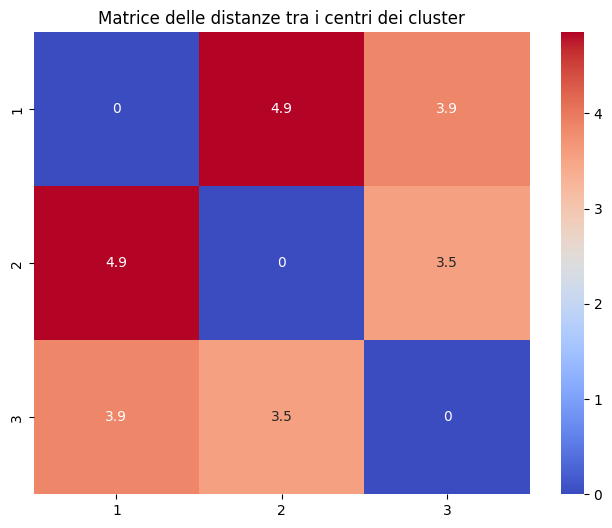

In [22]:
from scipy.spatial.distance import cdist
import seaborn as sns

# Calcolare i centri dei cluster (medie delle variabili per ogni cluster)
centroids = np.array([X_wine_scaled[clusters_3 == i].mean(axis=0) for i in np.unique(clusters_3)])

# Calcolare la matrice delle distanze tra i centri
distance_matrix = cdist(centroids, centroids)

# Visualizzare la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, cmap='coolwarm', xticklabels=np.unique(clusters_3), yticklabels=np.unique(clusters_3))
plt.title('Matrice delle distanze tra i centri dei cluster')
plt.show()


**Grafico 3D** mi consente di visualizzare i dati in uno spazio tridimensionale, con tre variabili significative da esplorare.

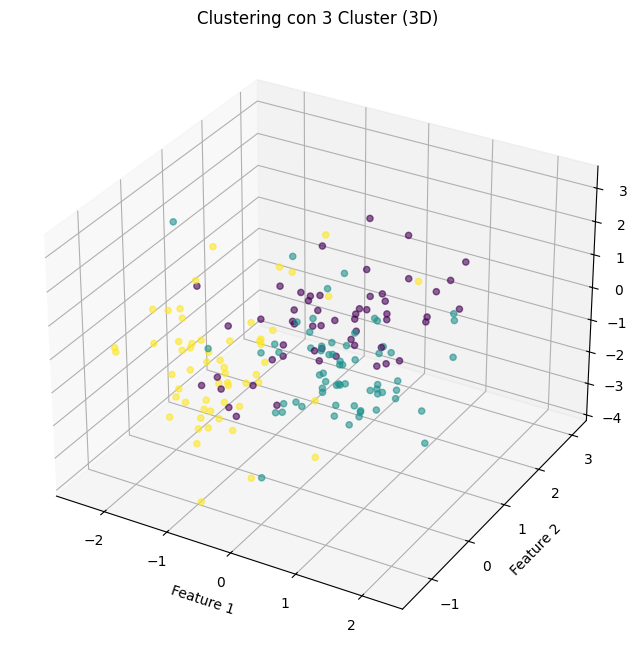

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Seleziona 3 variabili per il grafico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizza i punti nel grafico 3D
ax.scatter(X_wine_scaled[:, 0], X_wine_scaled[:, 1], X_wine_scaled[:, 2], c=clusters_3, cmap='viridis', alpha=0.6)
ax.set_title('Clustering con 3 Cluster (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()
